**Data Prep**

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (15,12)

In [2]:
house_df=pd.read_csv('kc_house_data.csv')
print(house_df.head())
print(house_df.info())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

**Data Cleansing**

In [3]:
house_df.isnull().values.any()
# Checking for blank entries

False

In [4]:
#house_df = house_df.drop ('date', 1)
# Dropping date as it only covers 2 years.

**Macro and Location**

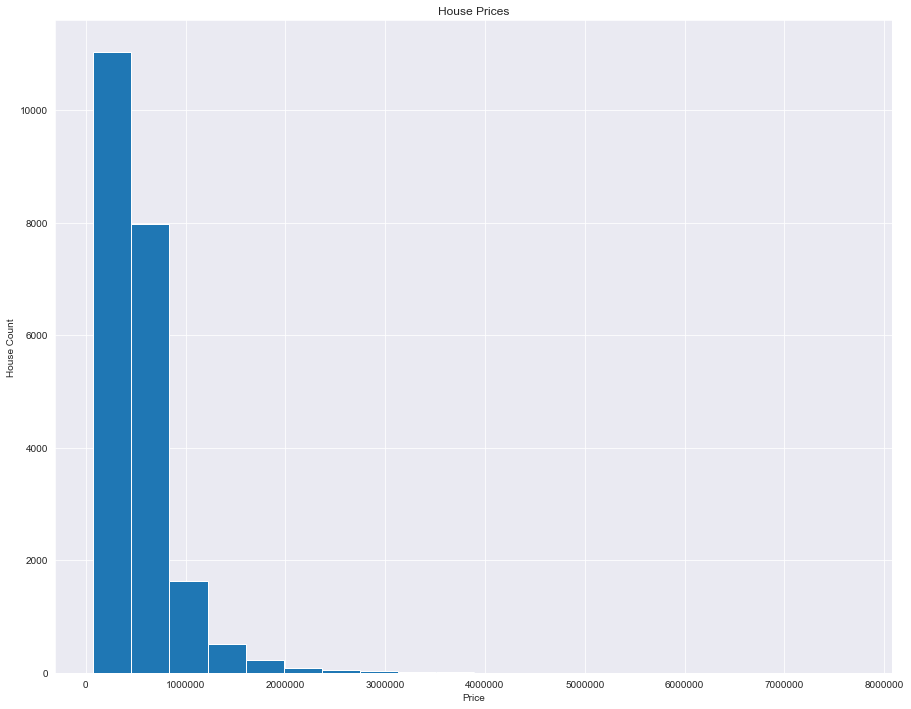

In [5]:
plt.hist(house_df['price'],bins=20)
plt.title("House Prices")
plt.ticklabel_format(style='plain')
plt.xlabel("Price")
plt.ylabel("House Count")
plt.show()
#looking at all house prices

321950.0


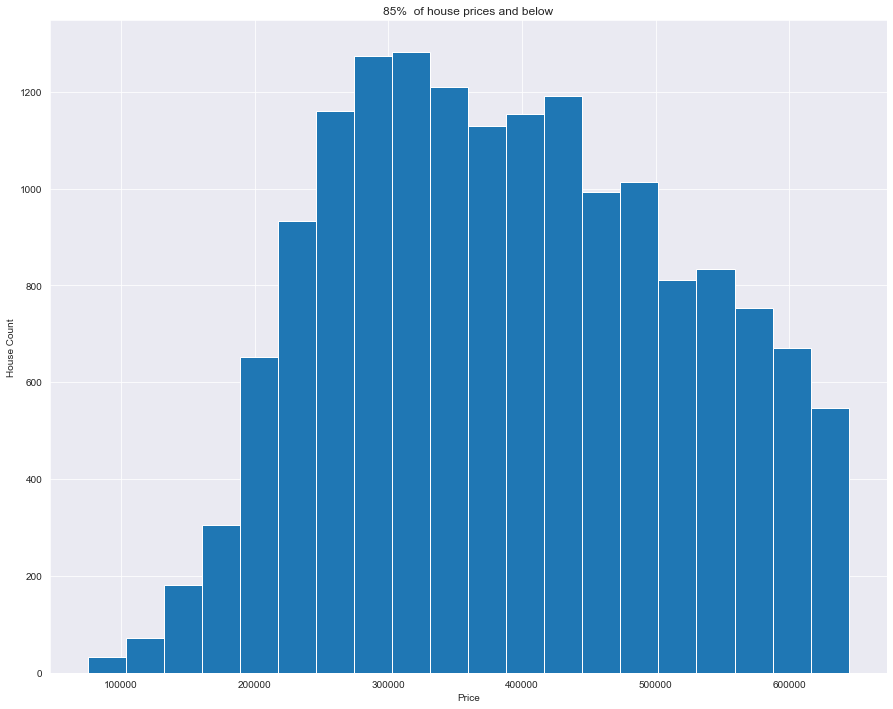

In [6]:
dfn=house_df[house_df.price < house_df.price.quantile(.75)]
print(house_df.price.quantile(.25))
plt.hist(dfn['price'],bins=20)
plt.title("85%  of house prices and below")
plt.xlabel("Price")
plt.ylabel("House Count")
plt.ticklabel_format(style='plain')
plt.show()
#looking at lower 85%

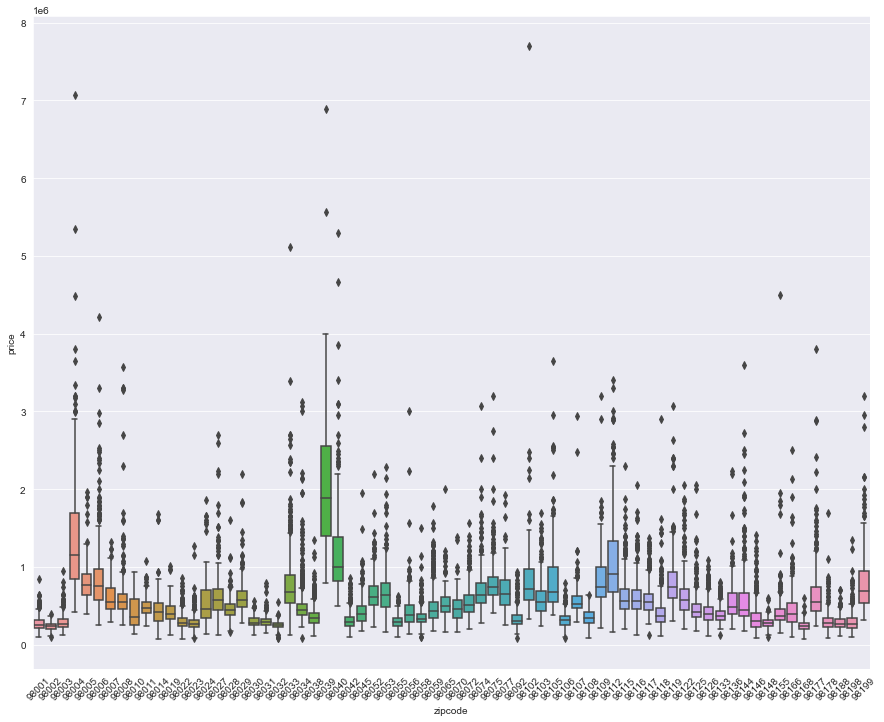

In [7]:
house_price = house_df[['price','zipcode']]
sns.boxplot(x='zipcode', y='price', data=house_price)
plt.xticks(rotation=45)
plt.show()
#looking at price by zipcode 

The majority of house prices falls under 1,000,000, except for a few zipcodes.  Location is a factor but not as big as one would think.

**Physical Attributes**

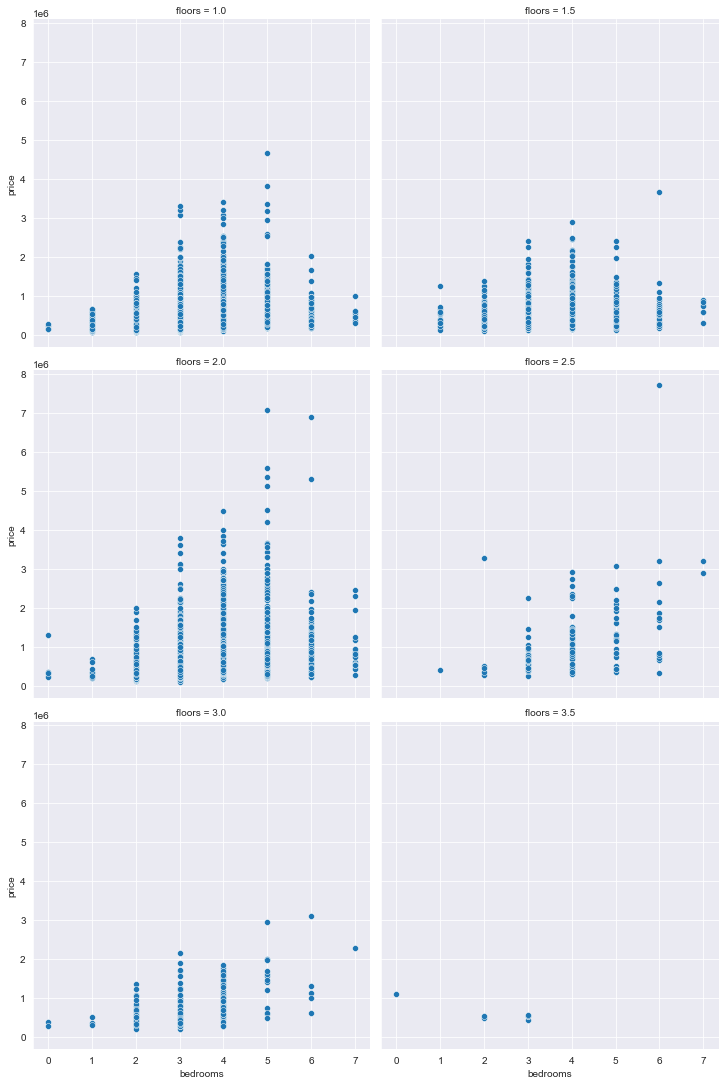

In [8]:
house_bed=house_df[house_df.bedrooms < 8]
sns.relplot(x='bedrooms', y='price',data=house_bed, col='floors',col_wrap=2)
plt.show()
#look at bedrooms vs price vs floors

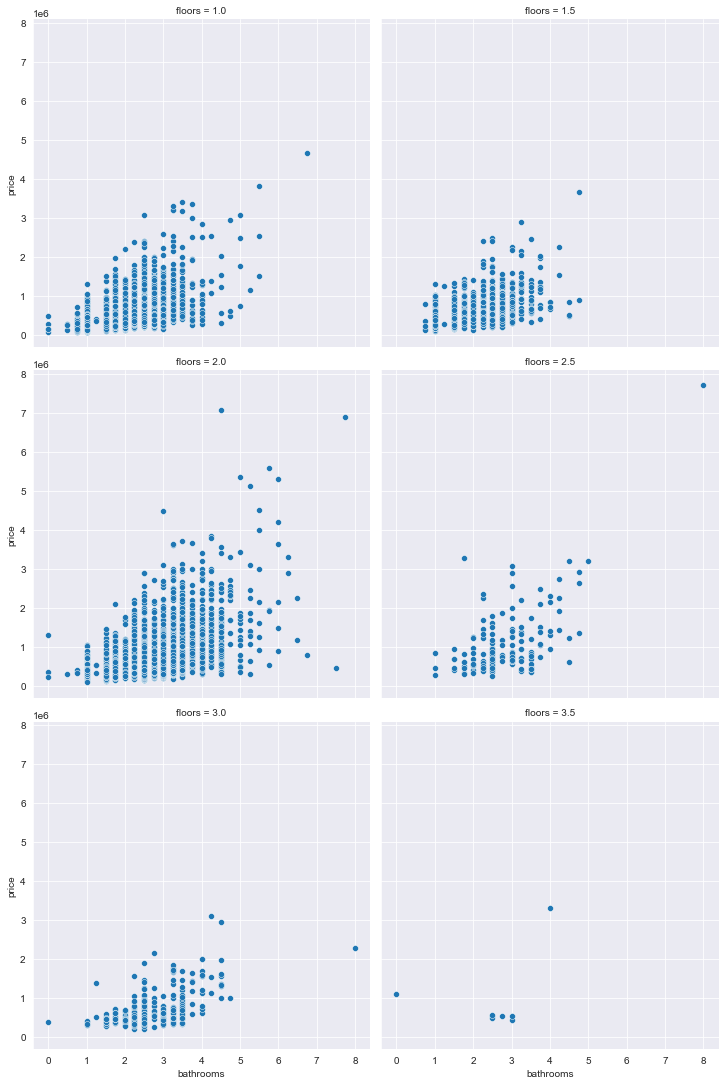

In [9]:
sns.relplot(x='bathrooms', y='price',data=house_df, col='floors',col_wrap=2)
plt.show()
#look at bathrooms vs price vs floors

Bedroom count has a general steeper correlation to price as it goes up.  

**Condition**

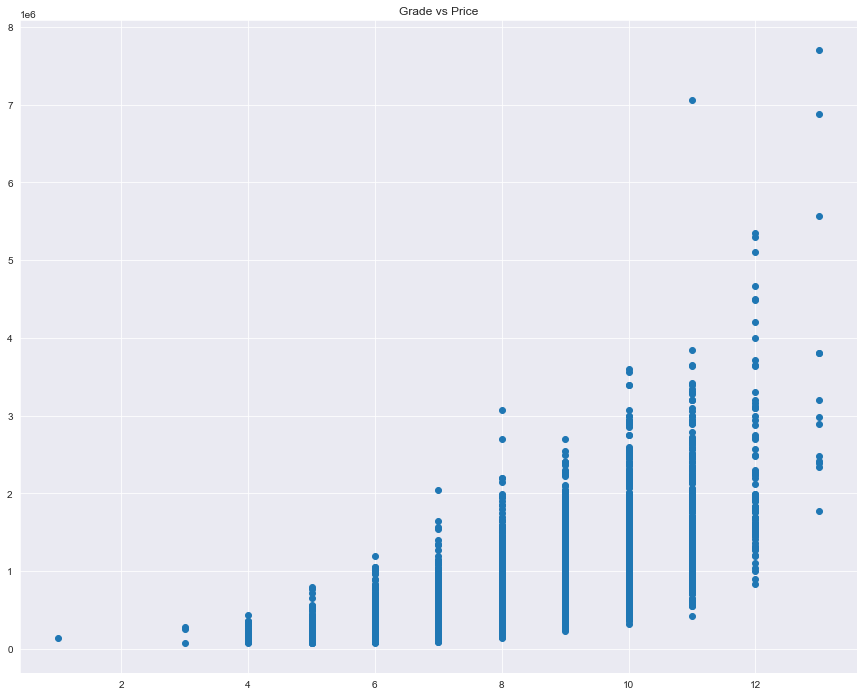

In [10]:
plt.scatter(x='grade', y='price', data=house_df,)
plt.title("Grade vs Price")
plt.show()

**Insights**

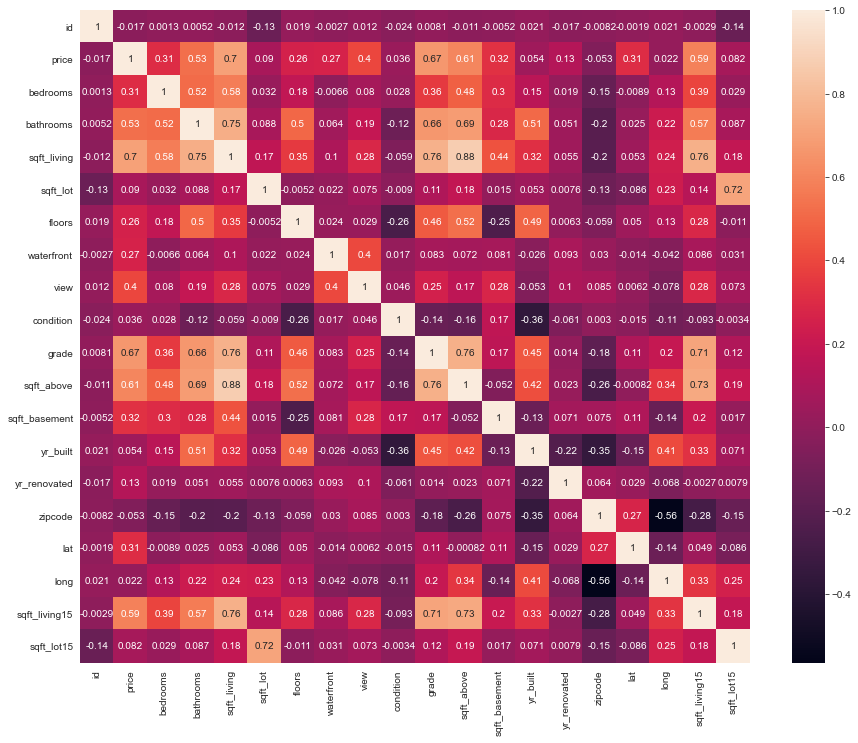

In [11]:
correlated_house = house_df.corr(method='pearson')
sns.heatmap(correlated_house, annot=True)
plt.savefig('snsheat.png')
plt.show()

Very large heatmap, but we want to focus on price so lets just get those values next.

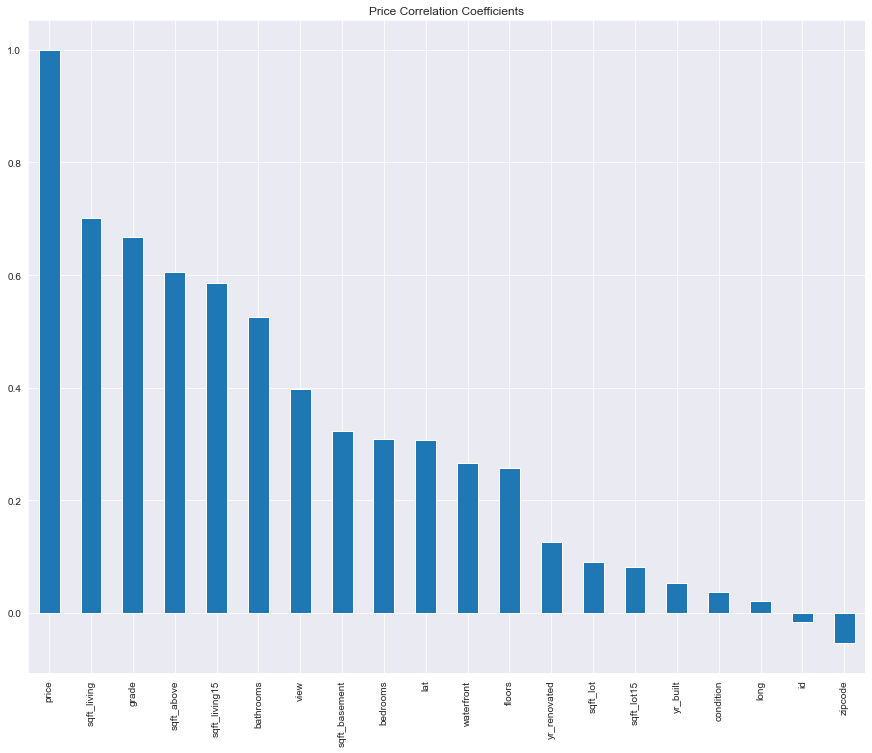

In [12]:
price_corr=correlated_house.iloc[1]
price_corr.sort_values(ascending=False).plot(kind='bar')
plt.title("Price Correlation Coefficients")
plt.savefig('pricecorr.png')
plt.show()
#price_corr.to_excel("price_corr.xlsx")
#Saved to excel for use in Power BI

Now that we can see the correlations, lets run a regression model using values that make sense.

In [22]:
independant_house= house_df[['sqft_living', 'grade','sqft_above', 'sqft_living15', 'bathrooms', 'view',
                         'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]
dependant_house = house_df[['price']]
independant_house = sm.add_constant(independant_house);
regression_model = sm.OLS(dependant_house,independant_house).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4151.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:37:31   Log-Likelihood:            -2.9602e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21602   BIC:                         5.921e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.239e+07   5.12e+05    -63.272

R-squared is .658.  Good correlation and all our p-values are pretty low.

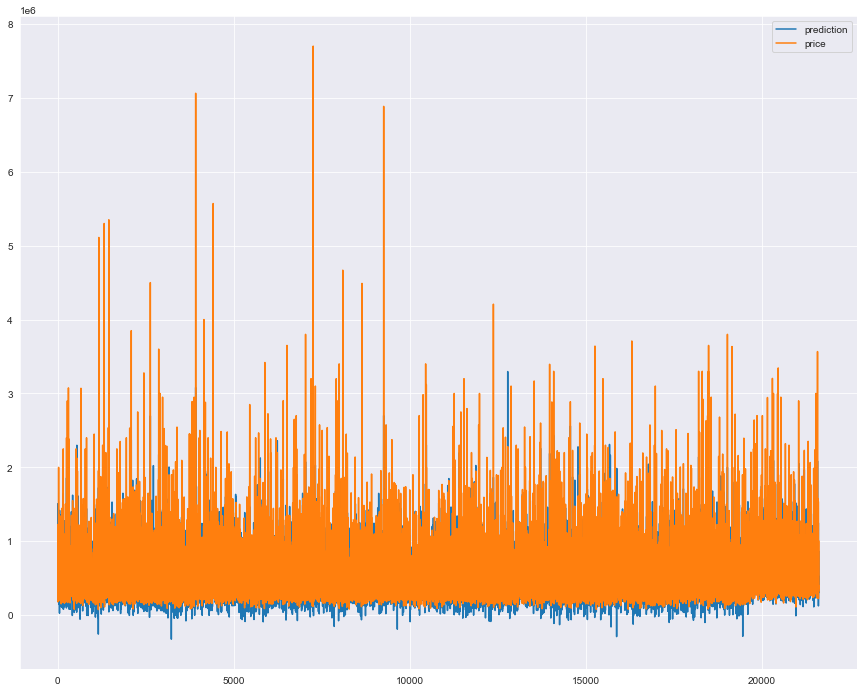

In [14]:
prediction=regression_model.predict(independant_house)
house_df['Prediction']=prediction;
pred_df = pd.DataFrame(prediction)
pred_df.columns = ['prediction']
df2 = pd.concat([pred_df,house_df['price']], axis=1, join='inner')
df2.plot(kind="line")
plt.show()
#df2.to_excel("prediction.xlsx")
#saved a copy to excel for Power BI
#very messy and hard to compare. Lets grab the first 50.

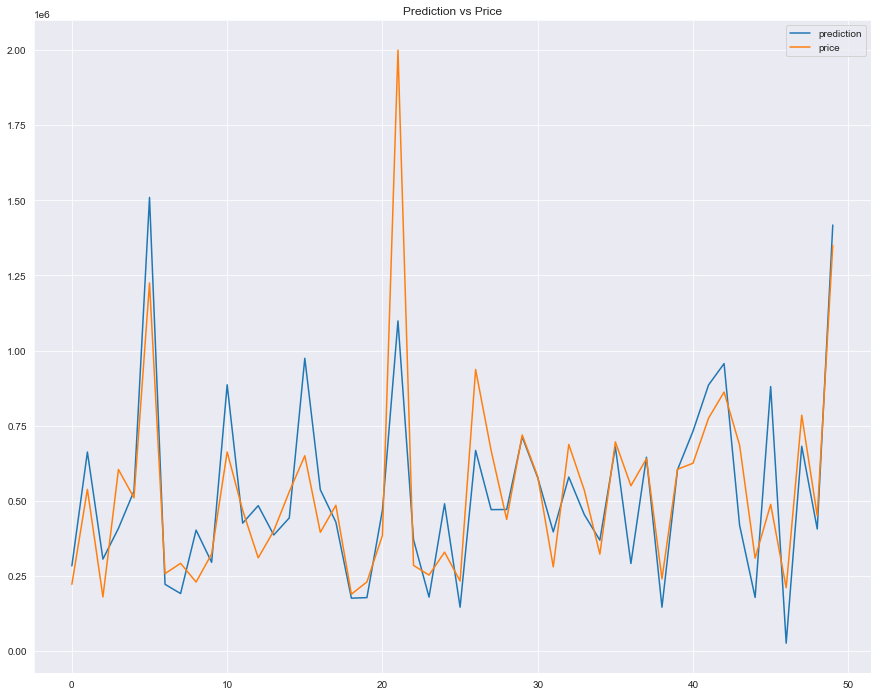

In [15]:
df3=df2.head(50)
df3.plot(kind="line")
plt.title("Prediction vs Price")
plt.show()

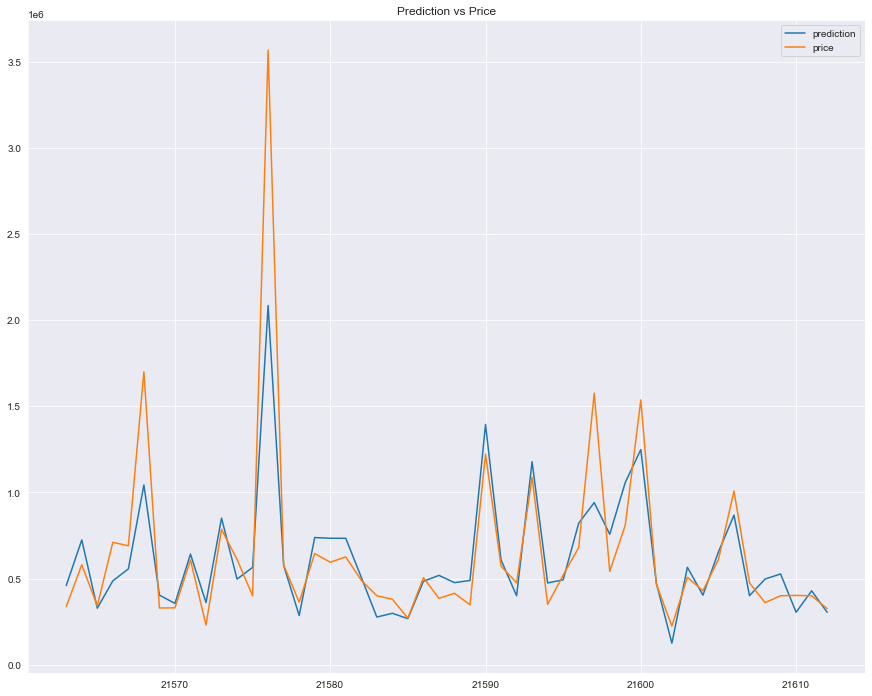

In [16]:
df4=df2.tail(50)
df4.plot(kind="line")
plt.title("Prediction vs Price")
plt.show()

Ran multiple line plots of our prediciton model vs price.  Prediction model tracks well.